# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 872717.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

In [6]:
cube.same_tensor(cube)

True

In [7]:
# cube.plot_cube()

In [8]:
cube.print_tensor()

Level: 1

[ 55  54  11 124  97]
[ 37  79  93 106  62]
[ 38 100 123  25  27]
[101  12  66  61  43]
[ 28  31  10 115 103]

Level: 2

[ 51  39  34  71 102]
[ 50   2 112  33 119]
[ 75 108  77  16 121]
[ 30  52  29  76 125]
[41 14 64 92 21]

Level: 3

[ 13  44 109 105 110]
[95 87 57 19 56]
[20 99 80 70 86]
[ 1 98 42 78 72]
[ 53 104   4  69  32]

Level: 4

[111  90  46  26  94]
[24 17 36 63 81]
[58 59  8 49 45]
[ 83  48 120  23   9]
[ 60   6   7  68 116]

Level: 5

[107   5  15 114  88]
[ 82 118  89  35  40]
[117  84  91  74  67]
[ 47  22 122 113  18]
[ 3 85 73 96 65]



In [9]:
# cube.plot_per_level()

In [10]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 1146631.0


## Local Seach Implementation

### Random Restart Hill-Climbing


In [11]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 872717.0


In [12]:
RR = Random_restart(cube=cube)

Initial Value: 1146631.0

Restart: 1

Initial Value: 1146631.0

Step 1: Choosen Neighbor Value: 1117503.0; Best Value: 1146631.0
Step 2: Choosen Neighbor Value: 1020296.0; Best Value: 1117503.0
Iteration Value: 1020296.0

Best Value: 1020296.0

Restart: 2

Initial Value: 1146631.0

Step 1: Choosen Neighbor Value: 1016180.0; Best Value: 1146631.0
Step 2: Choosen Neighbor Value: 990903.0; Best Value: 1016180.0
Step 3: Choosen Neighbor Value: 921379.0; Best Value: 990903.0
Iteration Value: 921379.0

Best Value: 921379.0

Restart: 3

Initial Value: 1146631.0

Step 1: Choosen Neighbor Value: 1091959.0; Best Value: 1146631.0
Step 2: Choosen Neighbor Value: 1028477.0; Best Value: 1091959.0
Step 3: Choosen Neighbor Value: 1006710.0; Best Value: 1028477.0
Step 4: Choosen Neighbor Value: 923235.0; Best Value: 1006710.0
Iteration Value: 923235.0

Best Value: 921379.0

Restart: 4

Initial Value: 1146631.0

Step 1: Choosen Neighbor Value: 986135.0; Best Value: 1146631.0
Step 2: Choosen Neighbor Val

In [13]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 5

  final Value: 761359.000000

+-------------------------- END ---------------------------+


In [14]:
print(f"Random Restart Best Value: {RR.best_value}\n")
print(f"Ideal Value: {obj_func_goal}\n")
print(f"differences from ideal: {RR.best_value - obj_func_goal}")

Random Restart Best Value: 761359.0

Ideal Value: 872717.0

differences from ideal: -111358.0


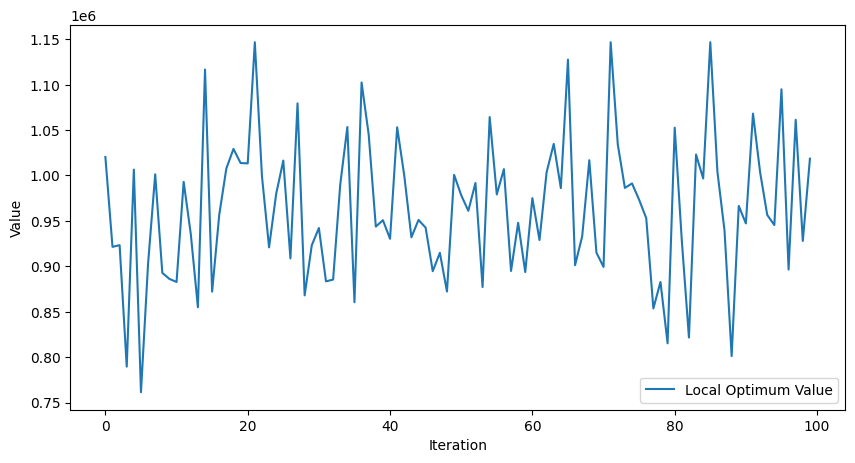

In [15]:
RR.hist_plot()

### Simulated Annealing

In [16]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 872717.0


In [17]:
SA = Simulated(cube=cube,tmax=100,step_max=100,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 1146631.0

Step:1, Energy: 1068047.0, Best Energy: 1146631.0,Temperature: 100

Step:2, Energy: 973646.0, Best Energy: 1068047.0,Temperature: 50.02501250625313

Step:3, Energy: 1368675.0, Best Energy: 973646.0,Temperature: 20.016012810248196

Step:4, Energy: 1323630.0, Best Energy: 973646.0,Temperature: 10.009008107296568

Step:5, Energy: 1505242.0, Best Energy: 973646.0,Temperature: 5.887894488930757

Step:6, Energy: 1259170.0, Best Energy: 973646.0,Temperature: 3.849855630413859

Step:7, Energy: 1349366.0, Best Energy: 973646.0,Temperature: 2.7053349204631534

Step:8, Energy: 1381532.0, Best Energy: 973646.0,Temperature: 2.0019619226842305

Step:9, Energy: 1140890.0, Best Energy: 973646.0,Temperature: 1.5399778243193296

Step:10, Energy: 1094409.0, Best Energy: 973646.0,Temperature: 1.220718026343095

Step:11, Energy: 1426780.0, Best Energy: 973646.0,Temperature: 0.9910802775024776

Step:12, Energy: 1375718.0, Best Energy: 973646.0,Temperature: 0.8204858917450915

Step

In [18]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 100
    final temp: 0.010009008107296567
    final step: 101

  final energy: 755875.000000

+-------------------------- END ---------------------------+


In [19]:
print(f"differences from ideal: {SA.best_energy - obj_func_goal}")

differences from ideal: -116842.0


In [20]:
SA.best_energy

755875.0

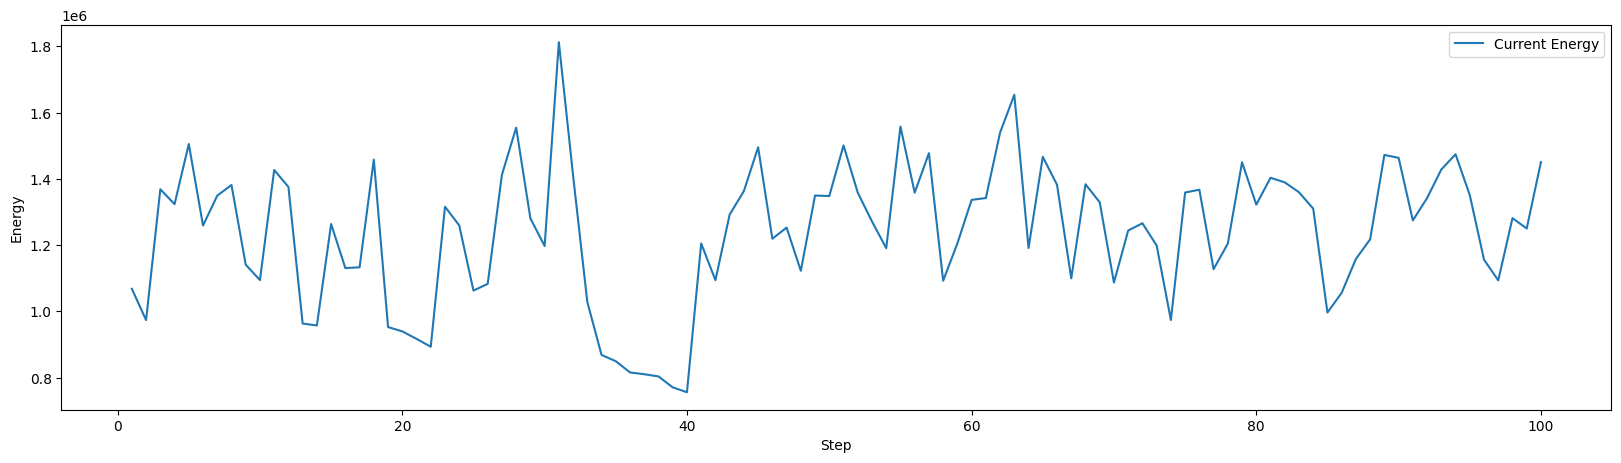

In [21]:
SA.hist_plot()

### Genetic Algorithm
